In [36]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *
from src.cort_processor_backup import *

from src.plotter import *
from src.filters import *
import math
import pickle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
test_session = CortProcessor('/mnt/c/oobootoo/rat-fes/data/results-meplem923/meepo_fast_923')
test_session.process()

read from t=0s to t=384.32s
read from t=0s to t=367.29s


(array([[240., 140., 180., ...,  80., 120., 140.],
        [ 80., 140.,  40., ..., 160., 100.,  80.],
        [  0., 120.,  20., ...,  60.,  80.,   0.],
        ...,
        [100.,   0.,  60., ...,  60., 100.,   0.],
        [  0.,  40.,  20., ...,  20.,  40.,   0.],
        [  0.,  60.,  80., ..., 200.,  60.,  40.]]),
 array([[ 57.04570981,  68.52154199,  99.700727  , ...,  85.96389651,
          75.35382826, 116.93322321],
        [ 36.4996488 ,  51.9334805 , 108.95429378, ...,  60.71062409,
          80.37769212,  94.83433549],
        [ 19.54975274,  49.76222537,  98.11528124, ...,  75.31351158,
          78.8937292 , 107.27672204],
        ...,
        [ 52.22852793,  78.35555014,  99.29736362, ...,  59.51694951,
          68.70136091,  99.38576458],
        [ 47.31020006,  70.14428143,  99.58226833, ...,  48.56430178,
          75.6090886 ,  89.48683408],
        [ 47.67175786,  64.09552069,  99.79731245, ...,  49.29364425,
          83.22919592,  91.97206143]]))

In [38]:
test_pred, test_act, testr2 = test_session.decode_phase()
test_tsf = np.linspace(0, (test_act.shape[0]*50)/1000,test_act.shape[0])

In [4]:
deprc_session = CortProcessorDeprc('/mnt/c/oobootoo/rat-fes/data/results-meplem923/meepo_fast_923')
deprc_session.process()

read from t=0s to t=384.32s
read from t=0s to t=367.29s


(array([[  0.,  20.,   0., ...,   0.,   0.,   0.],
        [ 20.,   0.,   0., ...,   0.,  40.,  20.],
        [  0.,  40.,  20., ...,  40.,   0.,   0.],
        ...,
        [ 60.,  20.,  20., ...,   0.,  80.,   0.],
        [  0.,  40.,   0., ...,   0.,  40.,   0.],
        [  0.,  20.,  40., ..., 120.,   0.,   0.]]),
 array([[ 57.04570981,  68.52154199,  99.700727  , ...,  85.96389651,
          75.35382826, 116.93322321],
        [ 36.4996488 ,  51.9334805 , 108.95429378, ...,  60.71062409,
          80.37769212,  94.83433549],
        [ 19.54975274,  49.76222537,  98.11528124, ...,  75.31351158,
          78.8937292 , 107.27672204],
        ...,
        [ 52.22852793,  78.35555014,  99.29736362, ...,  59.51694951,
          68.70136091,  99.38576458],
        [ 47.31020006,  70.14428143,  99.58226833, ...,  48.56430178,
          75.6090886 ,  89.48683408],
        [ 47.67175786,  64.09552069,  99.79731245, ...,  49.29364425,
          83.22919592,  91.97206143]]))

In [5]:
deprc_pred, deprc_act, deprcr2 = deprc_session.decode_phase()
deprc_tsf = np.linspace(0, (deprc_act.shape[0]*50)/1000,deprc_act.shape[0])

In [11]:
deprc_pred.shape

(13689, 7)

Text(0.05, 0.5, 'phase (degree)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
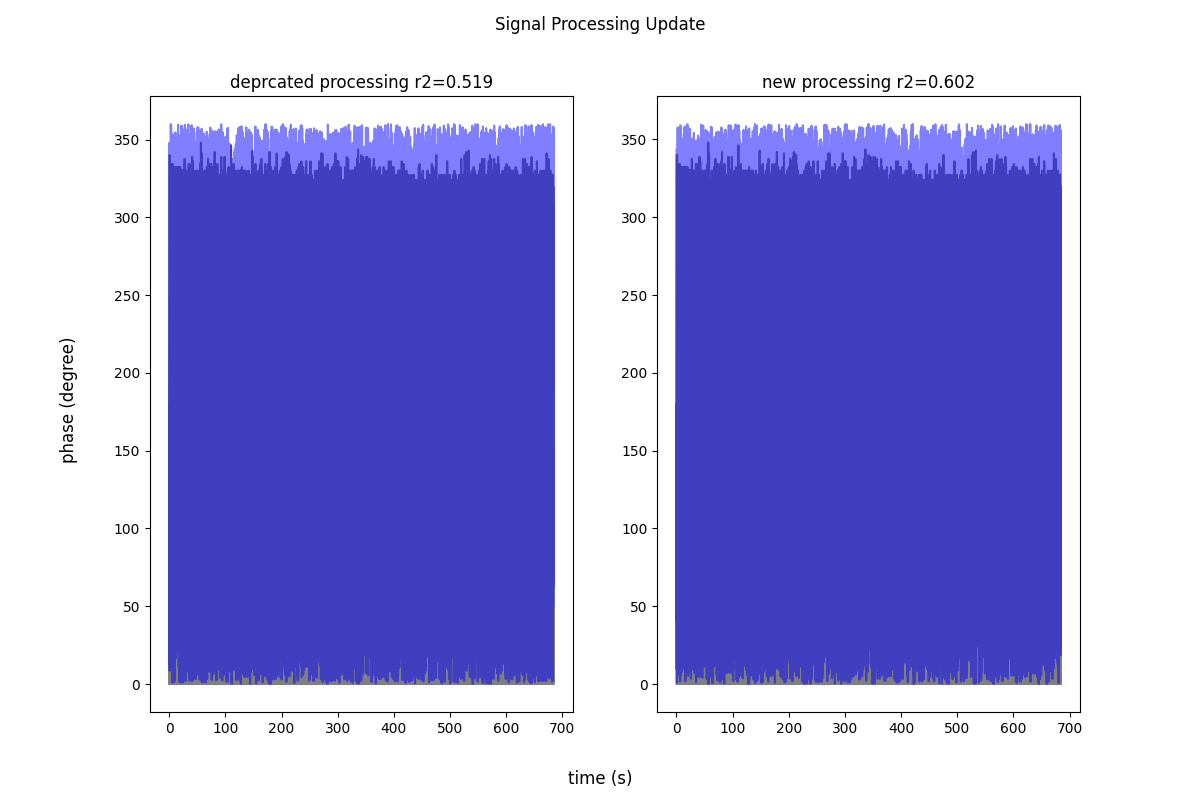

In [21]:
fig512, ax= plt.subplots(1, 2, figsize=(12,8), sharex = True)
fig512.suptitle('Signal Processing Update')
ax[0].set_title('deprcated processing r2=' + "{0:.3f}".format(deprcr2[3]))
ax[0].plot(deprc_tsf, deprc_act[:,3], c='k', alpha=0.5, label = "actual")
ax[0].plot(deprc_tsf, deprc_pred[:,3], c='b', alpha=0.5, label = "predicted")
ax[1].set_title('new processing r2=' + "{0:.3f}".format(testr2[3]))
ax[1].plot(test_tsf, test_act[:,3], c='k', alpha=0.5, label = "actual")
ax[1].plot(test_tsf, test_pred[:,3], c='b', alpha=0.5, label = "predicted")
fig512.text(.5,.02, 'time (s)', ha = 'center', size = 'large')
fig512.text(0.05,.5, 'phase (degree)', va='center', rotation='vertical', size = 'large')

In [43]:
print(deprcr2)
print(testr2)

[0.32070586237179366, 0.6028754485315618, 0.2572681139826676, 0.5194332256968227, 0.5382946082566374, 0.2652056710810484, 0.559387059996058]
[0.33938819639976525, 0.6378182888073153, 0.2725576339008489, 0.5441432085699681, 0.5602801827847407, 0.2776021580820733, 0.582582173230937]


In [39]:
h_angle, vaf_array, test_x, test_y = test_session.decode_angles()
dh_angle, dvaf_array, dtest_x, dtest_y = deprc_session.decode_angles()

In [41]:
print(np.mean(vaf_array, axis=1))
print(np.mean(dvaf_array, axis=1))


[0.22964131 0.54119145 0.18418933 0.56320709 0.46277806 0.31285143
 0.44519235]
[0.18151678 0.49029577 0.14818581 0.51714851 0.41812918 0.25680682
 0.39690215]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
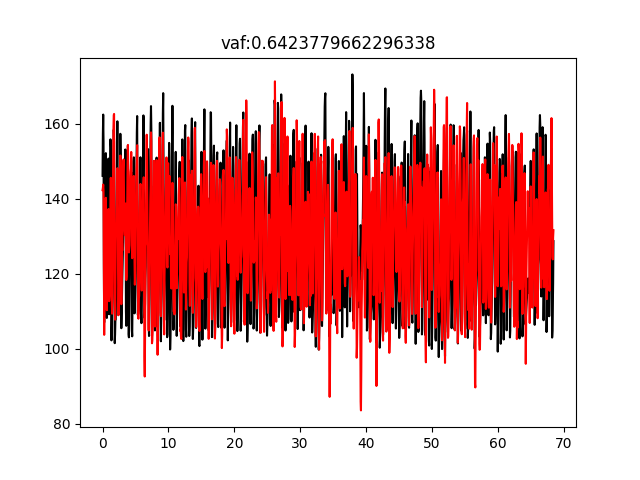

In [40]:
plot_wiener_filter_predic(test_x, test_y[:,3], h_angle[:,3])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
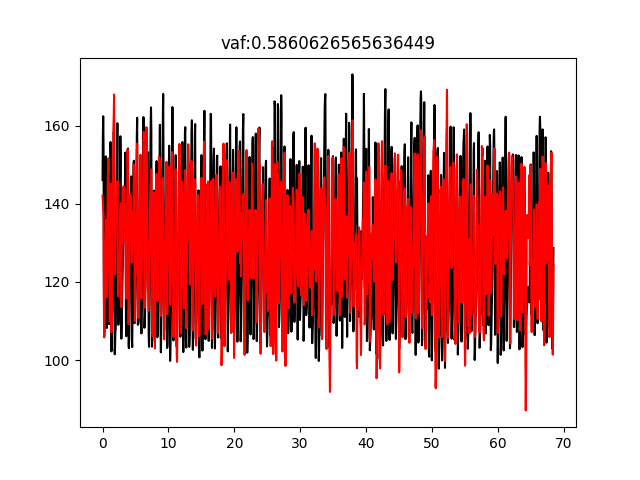

In [42]:
plot_wiener_filter_predic(dtest_x, dtest_y[:,3], dh_angle[:,3])
